In [1]:
import scanpy as sc
import scvi
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy
sc.set_figure_params(figsize=(4, 4))

# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

/home/owkin/ngot_wp_2/deepdeconv/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/owkin/ngot_wp_2/deepdeconv/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


# 1. Using the data processed by Khalil

In [6]:
adata = ad.read_h5ad("/home/owkin/project/scvi_models/adata_cti_5000.h5ad")

adata

AnnData object with n_obs × n_vars = 329762 × 5000
    obs: 'donor_id', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_types_grouped', '_scvi_batch', '_scvi_labels'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_ontology_term_id_colors', 'default_embedding', 'hvg', 'log1p', 'schema_vers

In [7]:
model = scvi.model.SCVI.load(dir_path="/home/owkin/project/scvi_models/",
                             adata=adata,
                             use_gpu=True
                             )

model.view_anndata_setup()

/home/owkin/ngot_wp_2/deepdeconv/scvi/model/base/_base_model.py:669: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(


INFO     File /home/owkin/project/scvi_models/model.pt already downloaded                                          


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Anndata setup with scvi-tools version 1.0.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': None,
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': ['assay', 'donor_id'],
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   1    │
│         n_cells          │ 329762 │
│ n_extra_categorical_covs │   2    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   1    │
│          n_vars          │  5000  │
└──────────────────────────┴────────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │           adata.layers['counts']           │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

           extra_categorical_covs State Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['assay']   │ 10x 3' v3  │          0          │
│                       │ 10x 5' v1  │          1          │
│                       │ 10x 5' v2  │          2          │
│                       │            │                     │
│ adata.obs['donor_id'] │    582C    │          0          │
│                       │    621B    │          1          │
│                       │    637C    │          2          │
│                       │    640C    │          3          │
│                       │    A29     │          4          │
│                       │    A31     │          5          │
│                       │    A35     │          6          │
│                       │    A36     │          7          │
│                       │    A37     │          8          │
│                       │    A52     │          9          │
│                       │    D496    │         10          │
│                       │    D503    │         11          │
│                       │            │                     │
└───────────────────────┴────────────┴─────────────────────┘

Plotting model losses 

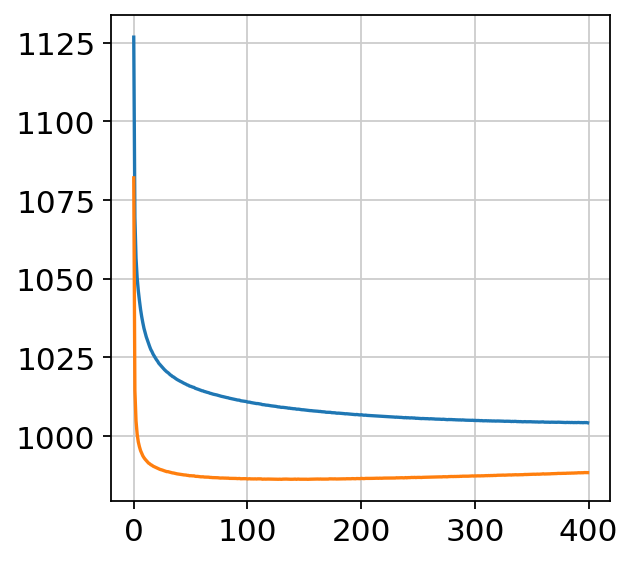

In [8]:
plt.plot(model.history["elbo_train"])
plt.plot(model.history["reconstruction_loss_train"])

In [9]:
adata.obs["cell_types_grouped"]

Pan_T7935490_AAACCTGCAAATTGCC    TNK
Pan_T7935490_AAACGGGCATCTGGTA    TNK
Pan_T7935490_AAACGGGTCTTGCATT    TNK
Pan_T7935490_AAAGCAATCATCGCTC    TNK
Pan_T7935490_AAAGTAGCAGTCACTA    TNK
                                ... 
CZINY-0112_TTTGGTTAGGCCACTC      TNK
CZINY-0112_TTTGGTTCACAAAGTA      TNK
CZINY-0112_TTTGGTTTCCATCACC      TNK
CZINY-0112_TTTGTTGCAGCGGTTC      TNK
CZINY-0112_TTTGTTGGTGCGACAA      TNK
Name: cell_types_grouped, Length: 329762, dtype: category
Categories (6, object): ['B', 'DC', 'Mast', 'MonoMacro', 'TNK', 'To remove']

# 2. Creating a signature matrix in latent space 

In [132]:
import random
from scipy.stats import pearsonr
import numpy as np

df_signature_denoised = pd.DataFrame()

num_cells = 1
num_repeats = 1000

dico_rpz = {}


for cell_type in adata.obs["cell_types_grouped"].unique():
        dico_rpz[cell_type] = []
        for repeat in range(num_repeats):
            seed = random.seed()
            sampled_cells = adata.obs[adata.obs['cell_types_grouped'] == cell_type].sample(n=num_cells,
                                                                                random_state=seed,replace = True).index
            #print(sampled_cells[:5])
            # Select the sampled cells from the DataFrame
            adata_sampled = adata[sampled_cells]
    
            # embeddings of single-cells
            # latent_sampled = model.get_latent_representation(adata_sampled)
            latent_sampled = model.module.z_encoder(torch.from_numpy(adata_sampled.layers["counts"].toarray()).to("cuda:0"))[1]
            # normalize in 1 direction 
            
            latent_sampled = latent_sampled.detach().cpu().numpy()

            correct = ((-np.inf < latent_sampled) *(latent_sampled < np.inf) * (1 - np.isnan(latent_sampled))).astype(bool)
            incorrect = (1-correct).astype(bool)
            
            number_incorrect = np.sum(incorrect)

            latent_sampled[incorrect] = 0.

            #latent_sampled[correct] = latent_sampled[correct] / np.abs(latent_sampled[correct]).sum(axis = 1)

            dim1_loc,dim2_loc = np.where(incorrect)
            latent_sampled[incorrect] = np.mean(latent_sampled[:,dim2_loc],axis=0)

            #if number_incorrect > 0:
                #print(f"For cell type {cell_type}, repeat {repeat+1}:")
                #print("Number of nans, infinities etc", np.sum(1-correct))
            

            mean_sampled_z = np.mean(latent_sampled,axis=0)
            dico_rpz[cell_type].append(mean_sampled_z.copy())
            




In [133]:
dico_rpz

{'TNK': [array([-18.025282  ,   2.3195963 ,  -8.108735  ,   0.39851448,
           2.4553306 ,  -9.6740055 ,  -6.641353  ,  -1.1675794 ,
           0.43677887,  -5.725865  ], dtype=float32),
  array([-15.892287 ,   1.6727474, -14.927691 ,  -4.346566 ,   1.2812239,
         -13.651405 , -20.16104  ,   0.0397841,   2.919362 ,  -2.2552557],
        dtype=float32),
  array([ -9.621496  ,   0.17450845, -13.355239  ,  24.289846  ,
           0.42148364, -12.872021  , -21.451021  ,   0.99153113,
           2.812142  ,  -1.0487702 ], dtype=float32),
  array([-18.054209 ,   2.545913 , -16.35856  ,  19.846706 ,   5.090907 ,
         -20.976152 , -22.034746 ,   1.7712748,   1.8289448,  -0.8944218],
        dtype=float32),
  array([-24.059652 ,  10.938049 , -14.899815 ,   3.3518853,   2.6968555,
         -17.953363 , -22.930817 ,  -4.1862125,   0.8686273,  -3.9017835],
        dtype=float32),
  array([-3.62854462e+01,  2.14548550e+01, -3.27921257e+01, -4.98289438e+05,
         -1.03489965e-01, -2.

In [134]:
obs = []
matrices = []
for key,value in dico_rpz.items():
    for repeat, repeat_rpz in enumerate(value):
        obs.append(key)
        matrices.append(repeat_rpz)
X = np.stack(matrices)

signature_adata = ad.AnnData(X= X, obs=obs )

In [135]:
signature_adata.obs["cell_type_high"] = signature_adata.obs[0]

In [136]:
# run PCA then generate UMAP plots
sc.pp.neighbors(signature_adata, use_rep="X")
sc.tl.umap(signature_adata, min_dist=0.3)

/home/owkin/project/python_envs/ulysse_envs/deepdeconv2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


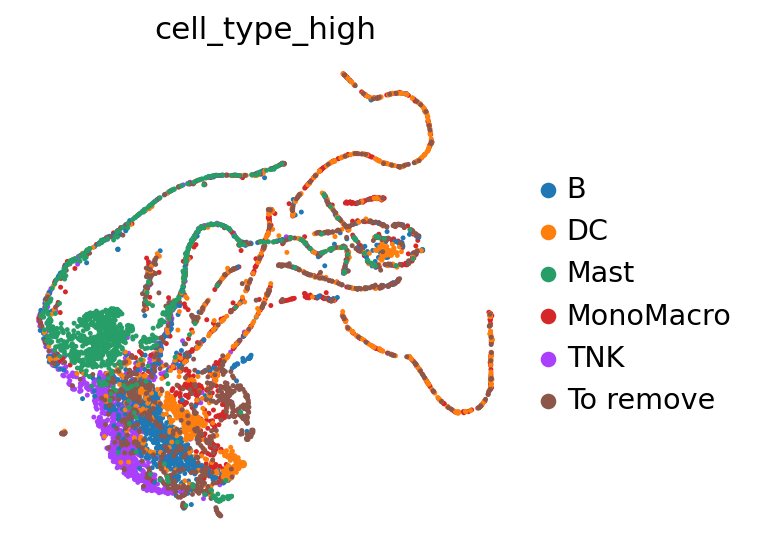

In [137]:
sc.pl.umap(
    signature_adata,
    color = ["cell_type_high"],
    frameon=False,
)

In [92]:
means = []
stds = []
for cell_type in signature_adata.obs["cell_type_high"].unique():
    means.append(signature_adata[signature_adata.obs['cell_type_high'] == cell_type].X.mean(axis = 0))
    stds.append(signature_adata[signature_adata.obs['cell_type_high'] == cell_type].X.std(axis = 0))
    

In [93]:
means

[array([ 2.67881651e+12, -1.09729175e+14, -8.79701745e+13,  1.16617002e+14,
        -1.66037216e+02, -2.42745953e+05, -5.60644897e+02,  5.42639791e+14,
        -4.70940228e+12,  5.79052084e+12], dtype=float32),
 array([ 7.7623159e+14, -5.6130864e+14,  5.7545307e+11, -8.5559859e+13,
        -3.1582249e+01, -6.2986451e+08, -6.3841412e+01, -7.6830883e+13,
         2.9311578e+14, -8.7500812e+14], dtype=float32),
 array([-1.2462461e+15,  1.3316133e+15,  4.0329280e+14, -2.3088950e+15,
        -4.8132027e+14,  1.1973579e+14, -5.7612805e+14,  7.3256224e+14,
        -2.5258703e+14, -1.2745318e+14], dtype=float32),
 array([ 2.3130350e+11,  1.6319539e+14, -2.4973148e+13, -2.4063779e+14,
        -5.1523027e+00,  2.2369141e+03, -2.0954397e+08,  9.2423200e+14,
         4.8812976e+11,  1.8245165e+15], dtype=float32),
 array([ 6.76906307e+13, -1.43131074e+15, -1.49455467e+14, -8.89987151e+14,
         1.72576114e+14,  3.39767040e+13,  2.05914322e+12,  1.28554277e+14,
        -1.60275701e+13,  1.027777

In [94]:
stds

[array([8.0004965e+12, 5.3537495e+14, 2.6651978e+14, 3.2966991e+14,
        8.7576251e+02, 7.5843681e+05, 1.8110043e+04, 1.7367667e+15,
        1.3094419e+13, 1.1164624e+14], dtype=float32),
 array([2.8936886e+15, 9.1218942e+15, 1.3319478e+14, 5.7436227e+15,
        7.2230536e-01, 4.6351954e+09, 7.5747585e-01, 3.5121806e+14,
        9.4777916e+14, 5.5151009e+15], dtype=float32),
 array([1.61486677e+15, 2.30494708e+15, 1.35290718e+15, 2.46584085e+15,
        1.72415100e+15, 6.35244454e+14, 1.02427836e+15, 3.64122952e+15,
        1.52496626e+15, 3.21381370e+15], dtype=float32),
 array([2.2176798e+12, 9.6646374e+15, 2.1660135e+15, 2.7539261e+15,
        6.6255398e+00, 4.5770366e+03, 4.5991350e+08, 6.4291623e+15,
        3.2406053e+13, 2.1351384e+15], dtype=float32),
 array([2.9297133e+14, 5.9340283e+15, 1.5999984e+15, 3.4488786e+15,
        5.2605766e+14, 1.6721184e+15, 1.0987558e+13, 5.2888425e+14,
        2.6836471e+14, 5.8007222e+15], dtype=float32),
 array([1.65851547e+02, 3.87596000e

## 3.1 Khalil s code 

In [97]:
import random
from scipy.stats import pearsonr
import numpy as np

N = 10

# Define the number of cells you want to sample

batch_size = [32, 64, 128, 256, 512, 1024, 2048, 4096] #, 8192, 16384, 32768, 65536, 131072] 

corrs = []
pvals = []

for n in batch_size:
    for i in range(N):
        current_corrs = []
        current_pvals = []
        # Calculate the number of cells to sample from each cell type proportionally
        sampled_cells_per_type = adata.obs['cell_types_grouped'].value_counts(normalize=True) * n
        sampled_cells_per_type = sampled_cells_per_type.astype(int)

        # Perform stratified sampling for each cell type
        sampled_cells = []
        for cell_type, num_cells in sampled_cells_per_type.items():
            seed = random.seed()
            sampled_cells.extend(adata.obs[adata.obs['cell_types_grouped'] == cell_type].sample(n=num_cells,
                                                                                    random_state=seed).index)

        # print(sampled_cells)
        # Select the sampled cells from the DataFrame
        adata_sampled = adata[sampled_cells]

        # embeddings of single-cells
        # latent_sampled = model.get_latent_representation(adata_sampled)
        latent_sampled = model.module.z_encoder(torch.from_numpy(adata_sampled.layers["counts"].toarray()).to("cuda:0"))[1]
        latent_sampled = latent_sampled.detach().cpu().numpy()
        mean_sampled_z = latent_sampled.mean(axis=0)

        # pseudo-bulk embedding
        pseudobulk_x = adata_sampled.layers["counts"].mean(axis=0) #.astype(int).astype(numpy.float32)
        pseudobulk_z = model.module.z_encoder(torch.from_numpy(pseudobulk_x).to("cuda:0"))[1]
        pseudobulk_z = pseudobulk_z.detach().cpu().numpy().flatten()

        print(mean_sampled_z, pseudobulk_z)
        
        # Compute correlation
        pearson_corr = pearsonr(mean_sampled_z, pseudobulk_z)
        #print(pearson_corr[0], pearson_corr[1])
        current_corrs.append(pearson_corr[0])
        current_pvals.append(pearson_corr[1])
    corrs.append(np.mean(current_corrs))

[-1.7422138e+01  2.4942222e+05 -2.4163580e+01 -1.2464485e+05
  2.9432315e-01 -1.6734688e+01 -2.3303061e+01  2.6266055e+00
  2.5256209e+00 -7.3564203e+04] [-14.369582    -0.3127091  -20.271059     5.3476133   -0.24070644
 -15.103247   -24.1961       0.22890282   2.7797675   -4.386601  ]
[ 4.9285331e+00 -8.9971545e+14 -4.4012089e+01           -inf
 -3.6742141e+00 -1.6234867e+01 -3.3837078e+01 -3.2955133e+02
 -1.1004988e+01  1.2908946e+04] [-1.8710110e+01 -9.1542063e+00 -4.2563744e+01  1.2611506e+01
 -4.4466162e+00 -1.1247343e+01 -3.5126404e+01 -4.0722724e-02
 -4.2365623e+00 -1.3876204e+01]


/home/owkin/project/python_envs/ulysse_envs/deepdeconv2/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4445: RuntimeWarning: invalid value encountered in subtract
  xm = x.astype(dtype) - xmean


ValueError: array must not contain infs or NaNs

In [99]:
v = np.random.rand(2,3)

In [100]:
v[1,0] = np.nan
v[0,2] = np.nan

In [101]:
v

array([[0.45995747, 0.97710836,        nan],
       [       nan, 0.34327768, 0.03500222]])

In [105]:

np.where(v!=v)

(array([0, 1]), array([2, 0]))

In [106]:
-np.inf != -np.inf

False